In [4]:
import os
#Set your own data files path here
path = r"C:\Users\SAI\Desktop\00_PROJECT\project_done\project_done-20200420T133725Z-001\project_done"
os.chdir(path)

### Import Libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import datetime

### Import all data

In [6]:
df_all = pd.read_csv("clustered_data.csv",low_memory=False)

### Basic EDA
#### Histograms of Numeric Variables

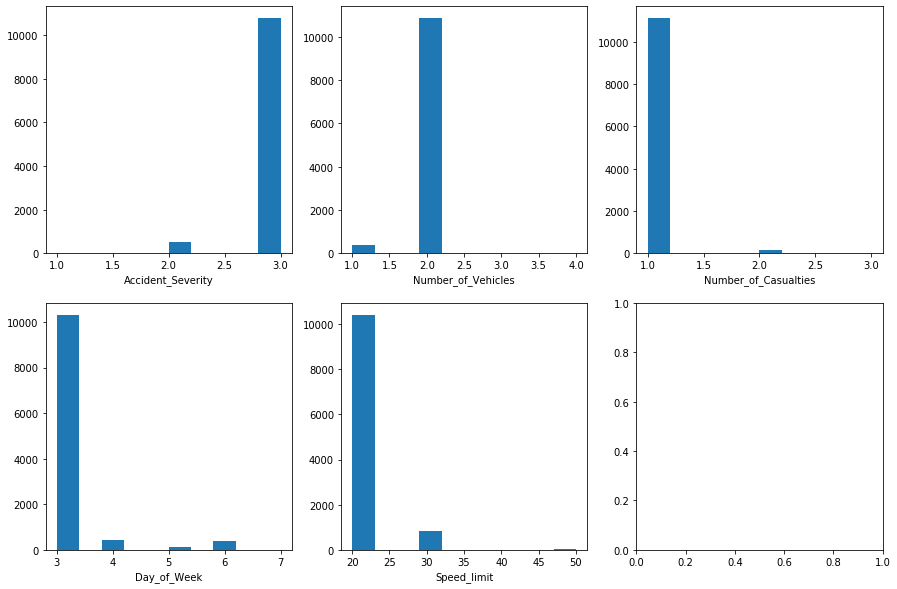

In [7]:
#EDA - Histogram of numeric vars
cols = ["Accident_Severity","Number_of_Vehicles","Number_of_Casualties","Day_of_Week","Speed_limit"]

f,a = plt.subplots(2,3,figsize=(15,10))
a = a.ravel()

for idx, ax in  enumerate(a):
    if idx < 5:
        ax.hist(df_all[cols[idx]],bins=10)
        #ax.set_title(cols[idx])
        ax.set_xlabel(cols[idx])
        # ax.set_ylabel(yaxes[idx])


Definition of Accident Severity:
1: Fatal
2: Serious
3: Slight

#### Count plots of Categorical Variables

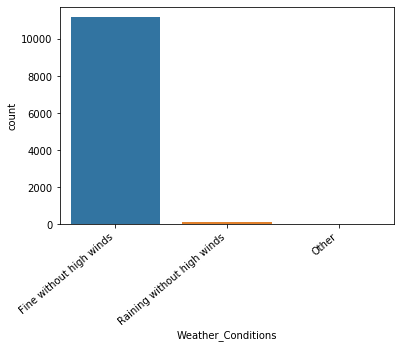

In [8]:
# start with weather conditions inner
wplot = sns.countplot(data=df_all,x="Weather_Conditions")
wplot.set_xticklabels(wplot.get_xticklabels(), rotation=40, ha="right")
plt.show()

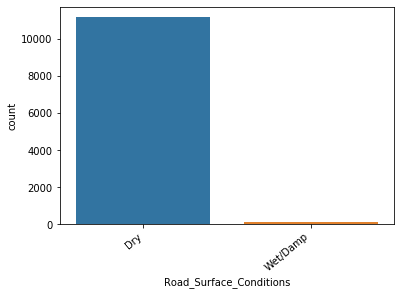

In [9]:
# start with weather conditions inner
rplot = sns.countplot(data=df_all,x="Road_Surface_Conditions")
rplot.set_xticklabels(rplot.get_xticklabels(), rotation=40, ha="right")
plt.show()

### Generate Negative Samples and Mapping it with Positive Samples

In [10]:
df_nonacc_n_acc = pd.DataFrame(columns=[
    'Longitude','Latitude','Cluster','Day_of_Week','Hour','Day_of_year','Local_Authority_(District)','1st_Road_Class',
    '1st_Road_Number','Speed_limit','Accident_Severity','Number_of_Vehicles','Number_of_Casualties',
    'Weather_Conditions','Road_Surface_Conditions','Accident'])
df_all = df_all.head(4000)
#for each accident, create 3 other data points
for index, row in df_all.iterrows():
    longitude=row['Longitude']
    latitude=row['Latitude']
    nclust=row['Cluster']
    dweek=row['Day_of_Week']
    nhr=row['Hour']
    nday=row['Day_of_year']
    lauthor=row['Local_Authority_(District)']
    roadclass=row['1st_Road_Class']
    roadnum=row['1st_Road_Number']
    splimit=row['Speed_limit']
    vehnum=row['Number_of_Vehicles']
    casualnum=row['Number_of_Casualties']
    weather=row['Weather_Conditions']
    surface=row['Road_Surface_Conditions']
    accsev=row['Accident_Severity']
    accident=row['Accident']
    dfnew=pd.DataFrame([[longitude,latitude,nclust,dweek,nhr,nday,lauthor,roadclass,roadnum,splimit,accsev,vehnum,
                         casualnum,weather,surface,accident]],
                columns=['Longitude','Latitude','Cluster','Day_of_Week','Hour','Day_of_year','Local_Authority_(District)', 
                         '1st_Road_Class','1st_Road_Number','Speed_limit','Accident_Severity','Number_of_Vehicles',
                         'Number_of_Casualties','Weather_Conditions','Road_Surface_Conditions','Accident'])
    df_nonacc_n_acc = df_nonacc_n_acc.append(dfnew,ignore_index=True)
    
    i=0
    while(i<3):
        dt_inner = datetime.datetime(2010,1,1)
        nday = random.randint(1, 365)
        dtdelta = datetime.timedelta(days=nday)
        dt_targ = dt_inner + dtdelta
        dweek = dt_targ.weekday()
        nhr = random.randint(0, 23)
        accident = 0   

        #check whether such record exist inner    
        isacc = df_all.loc[(df_all['Cluster'] == nclust) & (df_all['Day_of_year'] == nday) & 
                               (df_all['Hour'] == nhr)]
        if isacc.empty:
            i += 1
            dfnew = pd.DataFrame([[longitude,latitude,nclust,dweek,nhr,nday,lauthor,roadclass,roadnum,splimit,accsev,
                                   vehnum,casualnum,weather,surface,accident]], 
                                 columns=['Longitude','Latitude','Cluster','Day_of_Week','Hour','Day_of_year',
                                          'Local_Authority_(District)','1st_Road_Class','1st_Road_Number','Speed_limit',
                                          'Accident_Severity','Number_of_Vehicles','Number_of_Casualties',
                                          'Weather_Conditions','Road_Surface_Conditions','Accident'])
            df_nonacc_n_acc = df_nonacc_n_acc.append(dfnew,ignore_index=True)
        else:
            print([nclust,nday,nhr])
            print("Accident found!")
            
#save the data in new csv file        
df_nonacc_n_acc.to_csv("non_accident2014.csv",index=None)


[1, 12, 14]
Accident found!


In [8]:
print("Dataset Generated Successfully")

Dataset Generated Successfully
